<a href="https://colab.research.google.com/github/vk3232/Machine_learning/blob/main/ML_Expt_4_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exp: 4 Classification**

**Name: Vrushabh Babasaheb Khatik**

**Roll No: 313072**

**GR No: 22020234**

**Batch: ML10**

In [1]:
import tensorflow as tf
import numpy as np

# Import data

In [2]:
data = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = data.load_data()

x_train, x_test = x_train/ 255.0, x_test/ 255.0

11501568/11490434 [==============================] - 0s 0us/step


# Build Tensor Network

In [3]:
print("Training Tensors")
print("=======================")
print("Number of dimensions in tensor: %d"%x_train.ndim)
print("Tensor shape: ", x_train.shape)
print("Data type: %s"%x_train.dtype)
print("=======================")
print()
print("Test Tensors")
print("=======================")
print("Number of dimensions in tensor: %d"%x_test.ndim)
print("Tensor shape: ", x_test.shape)
print("Data type: %s"%x_test.dtype)

Training Tensors
Number of dimensions in tensor: 3
Tensor shape:  (60000, 28, 28)
Data type: float64

Test Tensors
Number of dimensions in tensor: 3
Tensor shape:  (10000, 28, 28)
Data type: float64


In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Tensor Network

In [5]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2942 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1056 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0726 - accuracy: 0.9765
313/313 - 1s - loss: 0.0734 - accuracy: 0.9775 - 525ms/epoch - 2ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropou

# Predict

In [6]:
predictions = model.predict(x_test)
print(predictions[1010])
np.argmax(predictions[1010])

[1.5223887e-12 4.4061040e-11 7.1038253e-10 5.6302931e-11 9.9916732e-01
 3.8687195e-10 1.2418942e-10 8.2651043e-04 4.7549526e-07 5.6953340e-06]


4

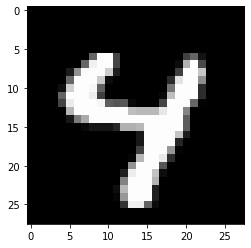

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1010],cmap='gray')

In [8]:
predictions = model.predict(x_test)
print(predictions[100])
print(type(predictions))
np.argmax(predictions[100])

[9.1030059e-05 5.2004232e-08 5.8250816e-06 1.5491344e-07 7.5191343e-07
 1.9301844e-05 9.9988127e-01 2.6088532e-07 1.3450444e-06 5.8646005e-10]
<class 'numpy.ndarray'>


6

In [9]:
pred=[]
for j in range(len(predictions)):
   pred.append(np.argmax(predictions[j]))

## Evaluate the Model 

In [10]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [11]:
import sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 973,    0,    0,    0,    0,    2,    2,    1,    2,    0],
       [   0, 1125,    4,    0,    0,    1,    2,    1,    2,    0],
       [   5,    1, 1007,    3,    2,    0,    2,    6,    6,    0],
       [   1,    1,    7,  984,    0,    1,    0,    8,    5,    3],
       [   2,    0,    3,    0,  959,    0,    4,    5,    1,    8],
       [   2,    0,    0,    9,    2,  863,    6,    2,    4,    4],
       [   5,    2,    1,    1,    2,    6,  940,    0,    1,    0],
       [   2,    2,    7,    2,    0,    0,    0, 1011,    0,    4],
       [   6,    1,    5,    4,    5,    3,    3,    6,  937,    4],
       [   3,    4,    0,    6,    8,    1,    0,    9,    2,  976]])

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [13]:
print('Accuracy:', sklearn.metrics.accuracy_score(y_test,pred))

print('F1 score:',sklearn.metrics.f1_score(y_test,pred,
                            average='weighted'))

print( 'Recall:',sklearn.metrics.recall_score(y_test,pred,
                              average='weighted'))

print('Precision:',sklearn.metrics.precision_score(y_test,pred,
                                    average='weighted'))

Accuracy: 0.9775
F1 score: 0.9774881499745685
Recall: 0.9775
Precision: 0.977542935257359


#**Conclusion:**

* Thus I learn about the classification in machine learning.
* I write Python code to identify the digit from image using neural network.
* I learn types of classification problem in machine learning and learn about confusion matrix to evaluate performance of model.